In [1]:
import replot
import numpy as np

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


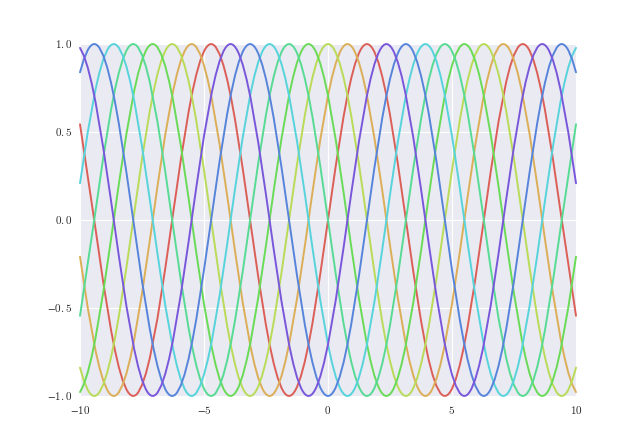

In [3]:
with replot.Figure() as figure:
    for i in range(8):
        figure.plot(lambda x: np.sin(x + np.pi * i / 4), (-10, 10))

<IPython.core.display.Javascript object>


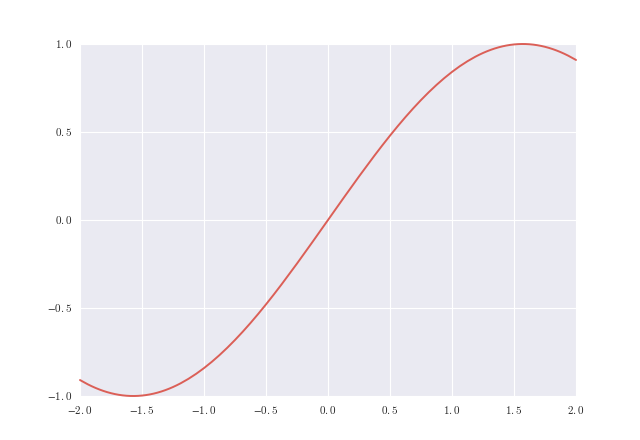

In [4]:
with replot.Figure() as figure:
    figure.plot(np.sin, (-2, 2))

<IPython.core.display.Javascript object>


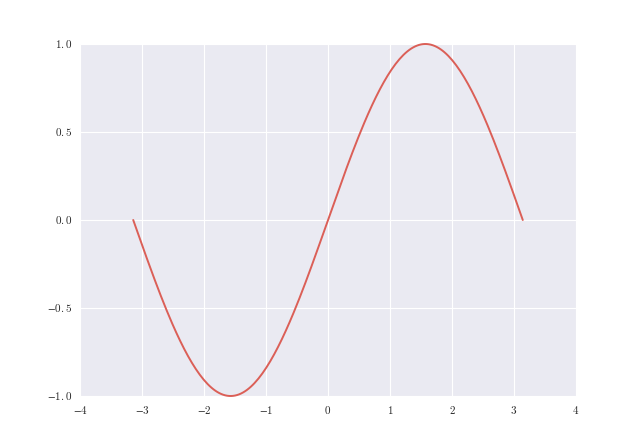

In [5]:
with replot.Figure() as figure:
    x = np.linspace(-np.pi, np.pi, 200)
    figure.plot(np.sin, x)

<IPython.core.display.Javascript object>


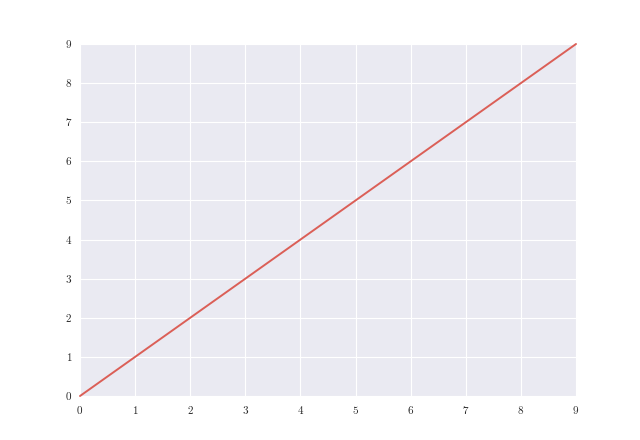

In [6]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x)

<IPython.core.display.Javascript object>


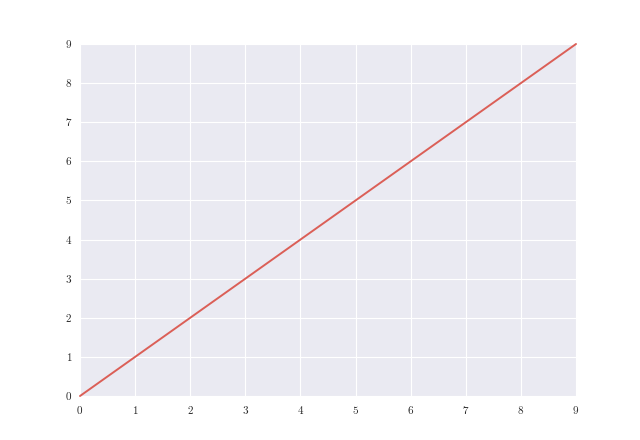

In [7]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x)

<IPython.core.display.Javascript object>


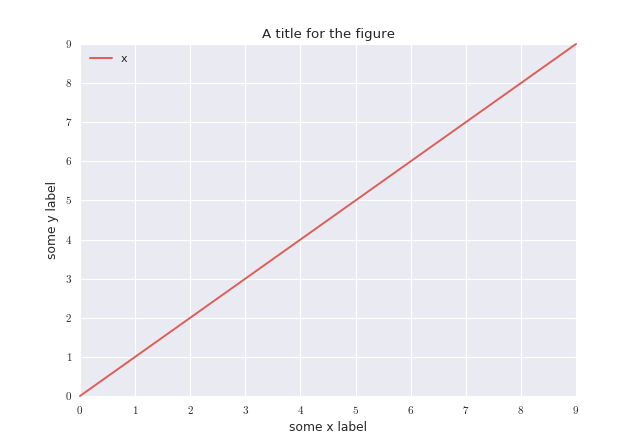

In [15]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x, label="x")
    figure.xlabel = "some x label"
    figure.ylabel = "some y label"
    figure.title = "A title for the figure"

<IPython.core.display.Javascript object>


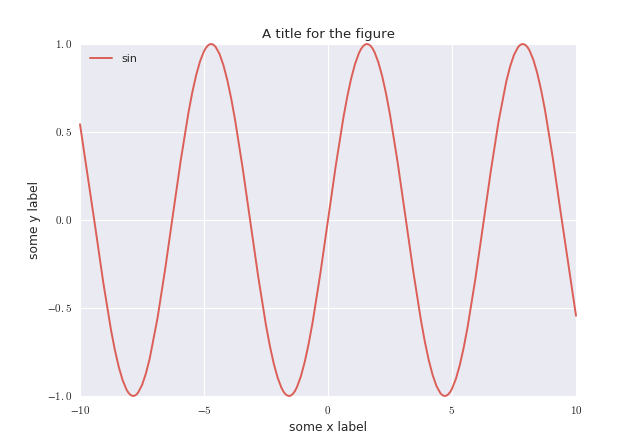

In [16]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend="best") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


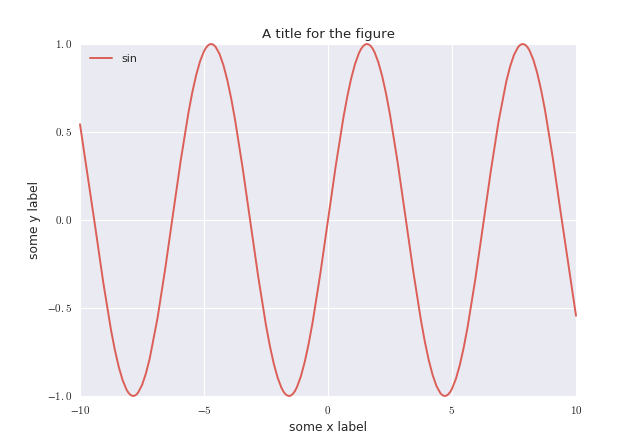

In [17]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


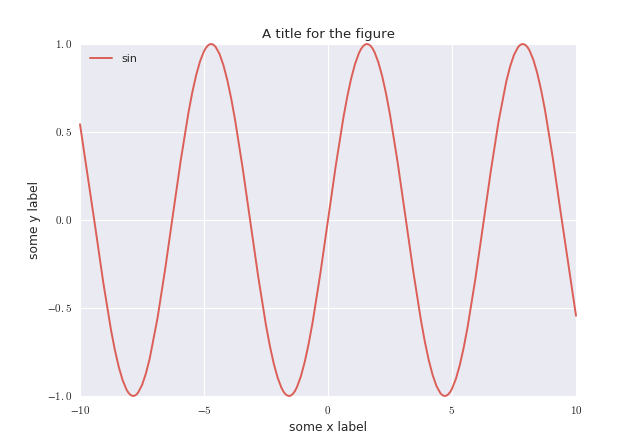

In [18]:
fig = replot.Figure(xlabel="some x label",
                      ylabel="some y label",
                      title="A title for the figure",
                      legend="best")
fig.plot(np.sin, (-10, 10), label="sin")
fig.show()

<IPython.core.display.Javascript object>


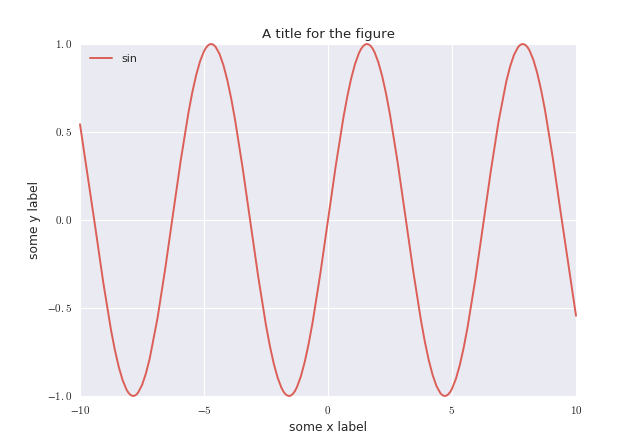

In [19]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


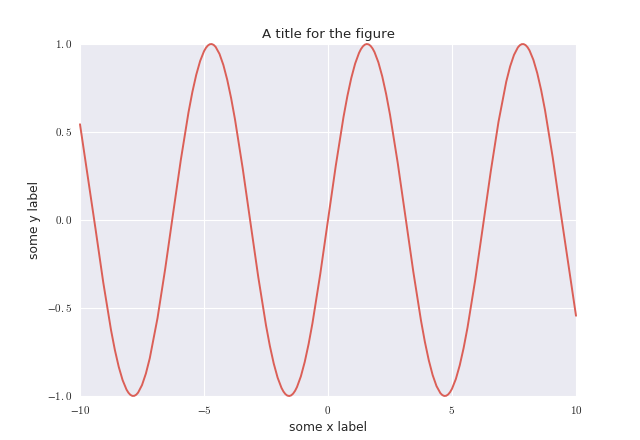

In [20]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=False) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


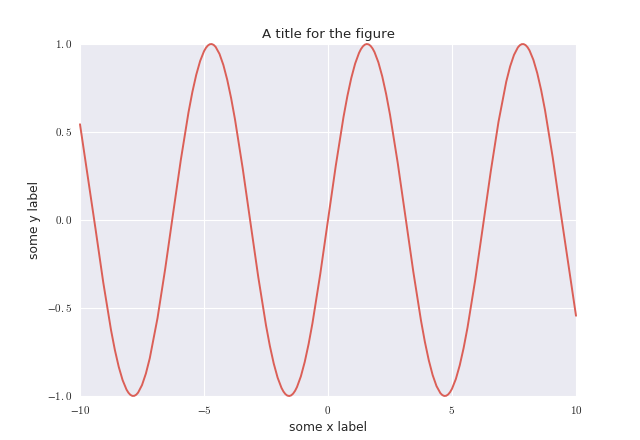

In [21]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, (-10, 10))

<IPython.core.display.Javascript object>


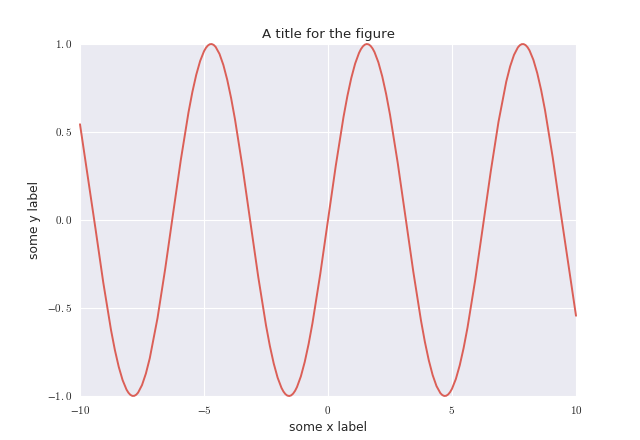

In [83]:
replot.plot([(np.sin, (-10, 10))],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best")

<IPython.core.display.Javascript object>


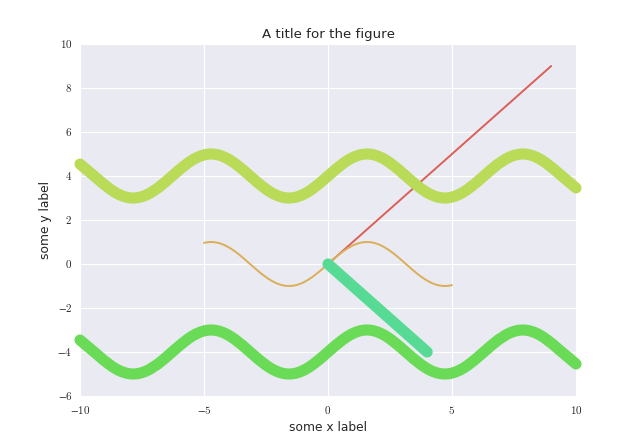

In [84]:
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best")

<IPython.core.display.Javascript object>


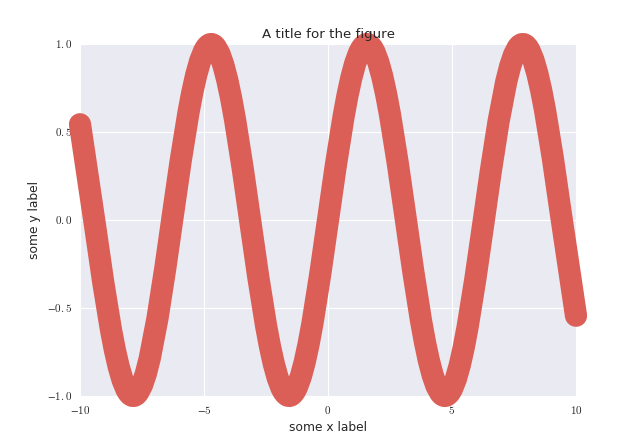

In [85]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, (-10, 10), linewidth=20)

<IPython.core.display.Javascript object>


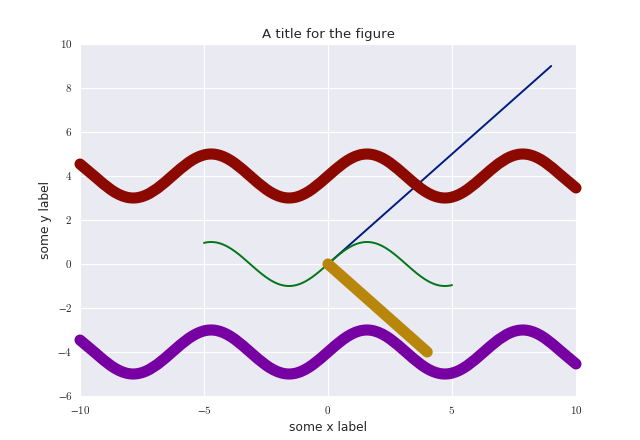

In [22]:
# One-liner plot
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette="dark")

<IPython.core.display.Javascript object>


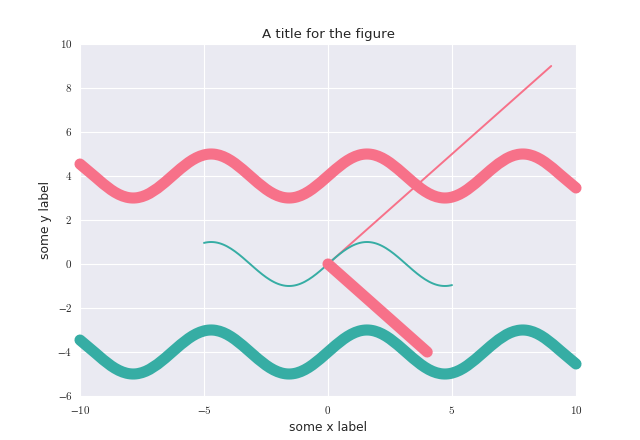

In [23]:
# One liner plot
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette=replot.sns.color_palette("husl", 2))

In [88]:
# Invalid interval for plotting a function
with replot.Figure() as figure:
    figure.plot(np.sin, None)

InvalidParameterError: Second parameter in plot command should be a tuple specifying plotting interval.

In [89]:
# Invalid plot call
with replot.Figure() as figure:
    figure.plot()

InvalidParameterError: You should pass at least one argument to this function.

<IPython.core.display.Javascript object>


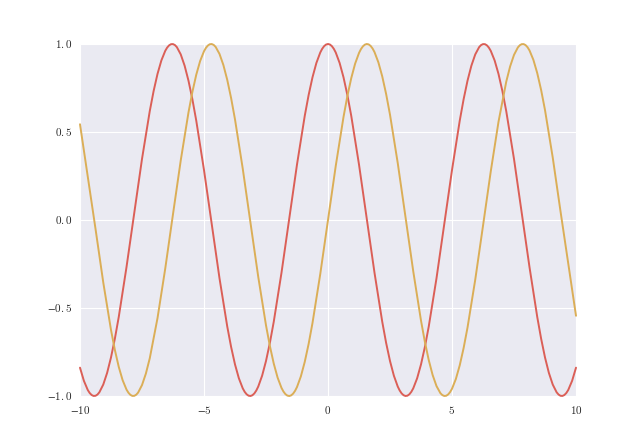

In [90]:
# Using groups to define subplots
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.sin, (-10, 10), group="ç")

In [91]:
# Invalid group argument
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="abc")

InvalidParameterError: Group name cannot be longer than one unicode character.

In [92]:
# Applying a grid to a figure, invalid call
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid([])

InvalidParameterError: Grid cannot be an empty list.

In [93]:
# Applying a grid to a figure, invalid call
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid(["a", "ba"])

InvalidParameterError: All rows must have the same number of elements.

<IPython.core.display.Javascript object>


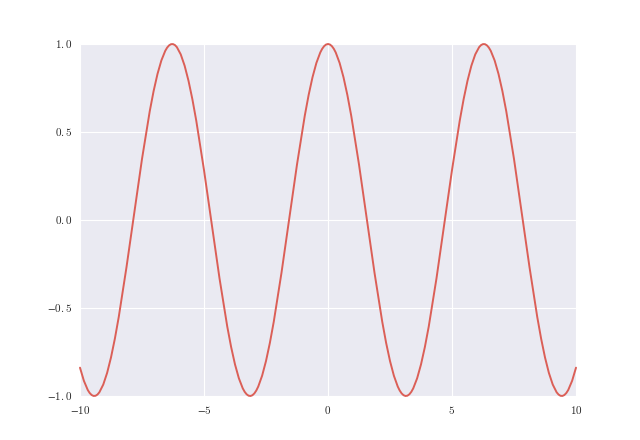

In [94]:
# TODO
# Applying a grid on a figure, one empty subplot
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid(["ab"])

In [95]:
# TODO
# Gridify example
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify()

InvalidParameterError: Grid cannot be an empty list.

In [96]:
# TODO
# Gridify example, forced height
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify(height=2)

InvalidParameterError: Grid cannot be an empty list.

In [97]:
# TODO
# Gridify example, forced width
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify(width=1)

InvalidParameterError: Grid cannot be an empty list.

<IPython.core.display.Javascript object>


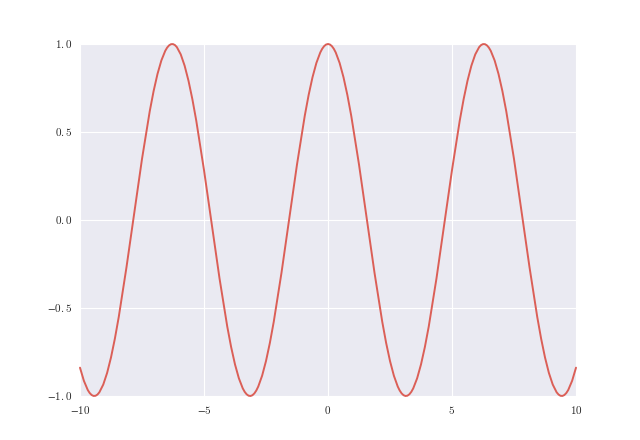

In [28]:
# Save a figure to a file
with replot.Figure(savepath="/tmp/out.png") as figure:
    figure.plot(np.cos, (-10, 10))

# or

with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.savepath = "/tmp/out.png"